This notebook shows how to use the global_biases diagnostic.

The `GlobalBiases` class provides an easy interface to plot 2D biases maps for a given experiment and a variables with respect to some observational data.

Let's plot the global mean temperature for the historical experiment, with a comparison done with the same ERA5 time span and 1990-1999 climatology.

In [1]:
from aqua.diagnostics import GlobalBiases, PlotGlobalBiases

As a first step, we initialize the GlobalBias class for both the dataset and the reference data.


In [ ]:
biases_ifs_nemo = GlobalBiases(catalog = 'climatedt-phase1', model='IFS-NEMO', exp='historical-1990', source='lra-r100-monthly', startdate="1990-01-01", enddate="1999-12-31", loglevel="INFO")

biases_era5 = GlobalBiases(model='ERA5', exp='era5', source='monthly', startdate="1990-01-01", enddate="1999-12-31", loglevel="INFO")


Now we retrieve the data for the target variable (e.g., 'q') and compute its climatology.
The climatology will be stored as a class attribute and can optionally be saved as a NetCDF file.
By setting areas to True, grid cell areas will be saved as an attribute of the class, which can be used for computing weighted statistics.

In [3]:
var = 'q'

biases_ifs_nemo.retrieve(var=var)
biases_ifs_nemo.compute_climatology(seasonal=True, save_netcdf=False, areas=True)

biases_era5.retrieve(var=var)
biases_era5.compute_climatology(seasonal=True, save_netcdf=False, areas=True)

2026-02-09 14:59:11 :: ConfigPath :: DEBUG    -> AQUA installation found in /home/b/b382321/.aqua
2026-02-09 14:59:11 :: ConfigPath :: DEBUG    -> Configuration file found in /home/b/b382321/.aqua/config-aqua.yaml
2026-02-09 14:59:11 :: ConfigPath :: DEBUG    -> Available catalogs are ['climatedt-phase1']
2026-02-09 14:59:11 :: ConfigPath :: DEBUG    -> Default catalog will be climatedt-phase1
2026-02-09 14:59:11 :: ConfigPath :: DEBUG    -> Catalog file is /home/b/b382321/.aqua/catalogs/climatedt-phase1/catalog.yaml
2026-02-09 14:59:11 :: ConfigPath :: DEBUG    -> Machine file is /home/b/b382321/.aqua/catalogs/climatedt-phase1/machine.yaml
2026-02-09 14:59:11 :: ConfigPath :: DEBUG    -> Machine found in configuration file, set to unknown
2026-02-09 14:59:11 :: ConfigPath :: DEBUG    -> Machine found in configuration file, set to unknown
2026-02-09 14:59:11 :: ConfigPath :: DEBUG    -> Browsing catalog climatedt-phase1 ...
2026-02-09 14:59:11 :: ConfigPath :: DEBUG    -> Catalog file 

2026-02-09 14:59:11 :: ConfigPath :: INFO     -> IFS-NEMO_historical-1990_lra-r100-monthly triplet found in in climatedt-phase1!
2026-02-09 14:59:11 :: ConfigPath :: DEBUG    -> Final catalog to be used is climatedt-phase1
2026-02-09 14:59:11 :: ConfigPath :: DEBUG    -> Catalog file is /home/b/b382321/.aqua/catalogs/climatedt-phase1/catalog.yaml
2026-02-09 14:59:11 :: ConfigPath :: DEBUG    -> Machine file is /home/b/b382321/.aqua/catalogs/climatedt-phase1/machine.yaml
2026-02-09 14:59:11 :: ConfigPath :: DEBUG    -> No paths found in the main configuration file {'climatedt-phase1': {'catalog': ['climatedt-o25.1', 'obs', 'climatedt-phase1', 'ci'], 'machine': 'levante', 'reader': {'catalog': '/home/b/b382321/.aqua/catalogs/climatedt-phase1/catalog.yaml', 'machine': '/home/b/b382321/.aqua/catalogs/climatedt-phase1/machine.yaml', 'fixer': '/home/b/b382321/.aqua/fixes', 'regrid': '/home/b/b382321/.aqua/grids'}, 'options': {'style': 'aqua'}}}
2026-02-09 14:59:12 :: Reader :: DEBUG    -> Us

Now we initialize the plotting class.  
The generated figures can optionally be saved as PNG or PDF files (enabled by default).

In [ ]:
plot_biases = PlotGlobalBiases(save_pdf=False, save_png=True, loglevel='INFO')

Let's plot the climatology of variable 'q' at 180 hPa for the IFS-NEMO data:

2026-02-09 15:00:30 :: Global Biases :: INFO     -> Plotting climatology.
2026-02-09 15:00:30 :: Pressure levels :: INFO     -> Selecting pressure level 18000 for variable 'q'.
2026-02-09 15:00:31 :: ConfigPath :: DEBUG    -> Updating the log_level to DEBUG
2026-02-09 15:00:31 :: ConfigPath :: DEBUG    -> AQUA installation found in /home/b/b382321/.aqua
2026-02-09 15:00:31 :: ConfigPath :: DEBUG    -> Configuration file found in /home/b/b382321/.aqua/config-aqua.yaml
2026-02-09 15:00:31 :: ConfigPath :: DEBUG    -> Catalog found in /home/b/b382321/.aqua/config-aqua.yaml file are ['climatedt-o25.1', 'obs', 'climatedt-phase1', 'ci']
2026-02-09 15:00:31 :: ConfigPath :: DEBUG    -> Available catalogs are ['climatedt-o25.1', 'obs', 'climatedt-phase1', 'ci']


2026-02-09 15:00:31 :: ConfigPath :: DEBUG    -> Default catalog will be climatedt-o25.1
2026-02-09 15:00:31 :: ConfigPath :: DEBUG    -> Catalog file is /home/b/b382321/.aqua/catalogs/climatedt-o25.1/catalog.yaml
2026-02-09 15:00:31 :: ConfigPath :: DEBUG    -> Machine file is /home/b/b382321/.aqua/catalogs/climatedt-o25.1/machine.yaml
2026-02-09 15:00:31 :: ConfigPath :: DEBUG    -> Machine found in configuration file, set to unknown
2026-02-09 15:00:31 :: ConfigStyle :: DEBUG    -> Style file: /home/b/b382321/.aqua/styles/aqua.mplstyle
2026-02-09 15:00:31 :: ConfigStyle :: DEBUG    -> Setting style aqua from file /home/b/b382321/.aqua/styles/aqua.mplstyle
2026-02-09 15:00:31 :: plot_single_map :: DEBUG    -> Loading data in memory
2026-02-09 15:00:31 :: plot_single_map :: DEBUG    -> Adding cyclic longitude
2026-02-09 15:00:31 :: plot_single_map :: DEBUG    -> Setting vmin to 3.0073133764475453e-06, vmax to 6.025655086877107e-05
2026-02-09 15:00:31 :: plot_single_map :: DEBUG    -> 

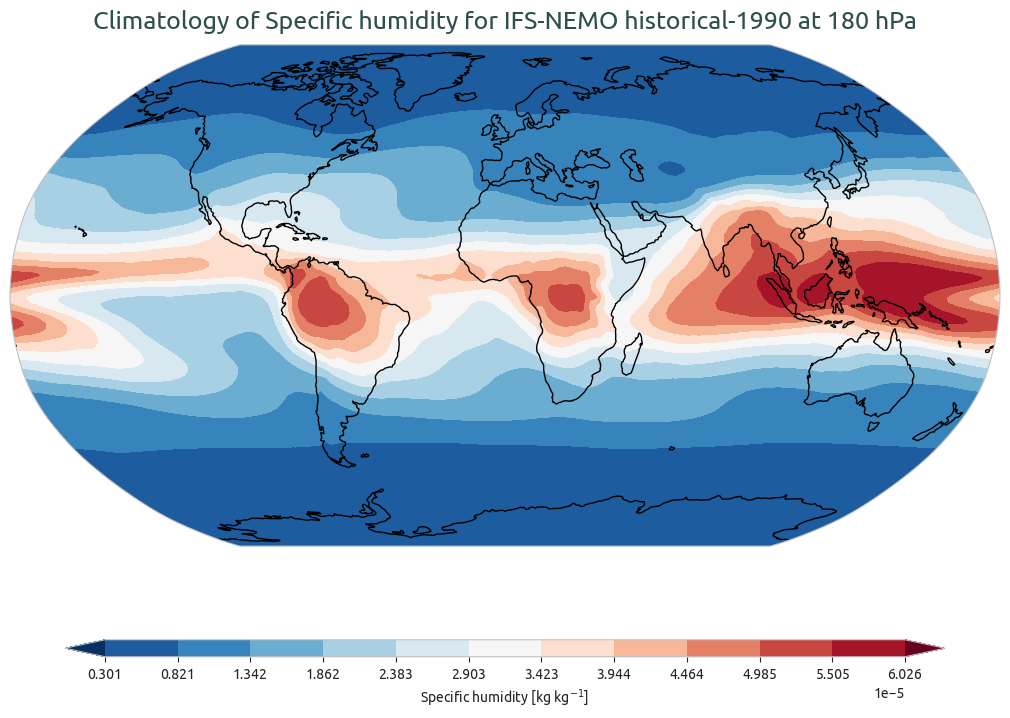

In [5]:
plot_biases.plot_climatology(data=biases_ifs_nemo.climatology, var=var, plev=18000)

Now we plot the total bias map for variable 'q' between IFS-NEMO data and the reference dataset ERA5:


2026-02-09 15:00:32 :: Global Biases :: INFO     -> Plotting global biases.
2026-02-09 15:00:32 :: Pressure levels :: INFO     -> Selecting pressure level 18000 for variable 'q'.
2026-02-09 15:00:32 :: Pressure levels :: INFO     -> Selecting pressure level 18000 for variable 'q'.
2026-02-09 15:00:32 :: ConfigPath :: DEBUG    -> AQUA installation found in /home/b/b382321/.aqua
2026-02-09 15:00:32 :: ConfigPath :: DEBUG    -> Configuration file found in /home/b/b382321/.aqua/config-aqua.yaml
2026-02-09 15:00:32 :: ConfigPath :: DEBUG    -> Catalog found in /home/b/b382321/.aqua/config-aqua.yaml file are ['climatedt-o25.1', 'obs', 'climatedt-phase1', 'ci']
2026-02-09 15:00:32 :: ConfigPath :: DEBUG    -> Available catalogs are ['climatedt-o25.1', 'obs', 'climatedt-phase1', 'ci']
2026-02-09 15:00:32 :: ConfigPath :: DEBUG    -> Default catalog will be climatedt-o25.1
2026-02-09 15:00:32 :: ConfigPath :: DEBUG    -> Catalog file is /home/b/b382321/.aqua/catalogs/climatedt-o25.1/catalog.yam

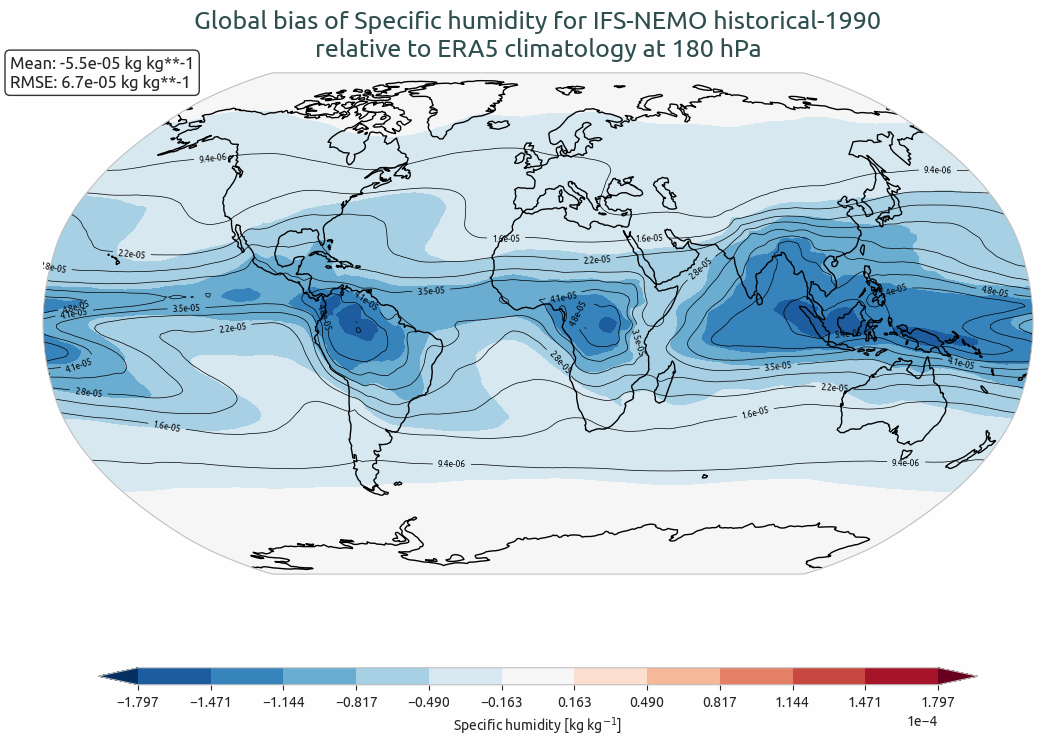

In [6]:
plot_biases.plot_bias(data=biases_ifs_nemo.climatology, data_ref=biases_era5.climatology, var=var, plev=18000, area=biases_ifs_nemo.climatology['cell_area'], show_stats=True)

We can also do a seasonal analysis:

2026-02-09 15:00:34 :: Global Biases :: INFO     -> Plotting seasonal biases.
2026-02-09 15:00:34 :: Pressure levels :: INFO     -> Selecting pressure level 18000 for variable 'q'.
2026-02-09 15:00:34 :: Pressure levels :: INFO     -> Selecting pressure level 18000 for variable 'q'.
2026-02-09 15:00:34 :: ConfigPath :: DEBUG    -> AQUA installation found in /home/b/b382321/.aqua
2026-02-09 15:00:34 :: ConfigPath :: DEBUG    -> Configuration file found in /home/b/b382321/.aqua/config-aqua.yaml
2026-02-09 15:00:34 :: ConfigPath :: DEBUG    -> Catalog found in /home/b/b382321/.aqua/config-aqua.yaml file are ['climatedt-o25.1', 'obs', 'climatedt-phase1', 'ci']
2026-02-09 15:00:34 :: ConfigPath :: DEBUG    -> Available catalogs are ['climatedt-o25.1', 'obs', 'climatedt-phase1', 'ci']
2026-02-09 15:00:34 :: ConfigPath :: DEBUG    -> Default catalog will be climatedt-o25.1
2026-02-09 15:00:34 :: ConfigPath :: DEBUG    -> Catalog file is /home/b/b382321/.aqua/catalogs/climatedt-o25.1/catalog.y

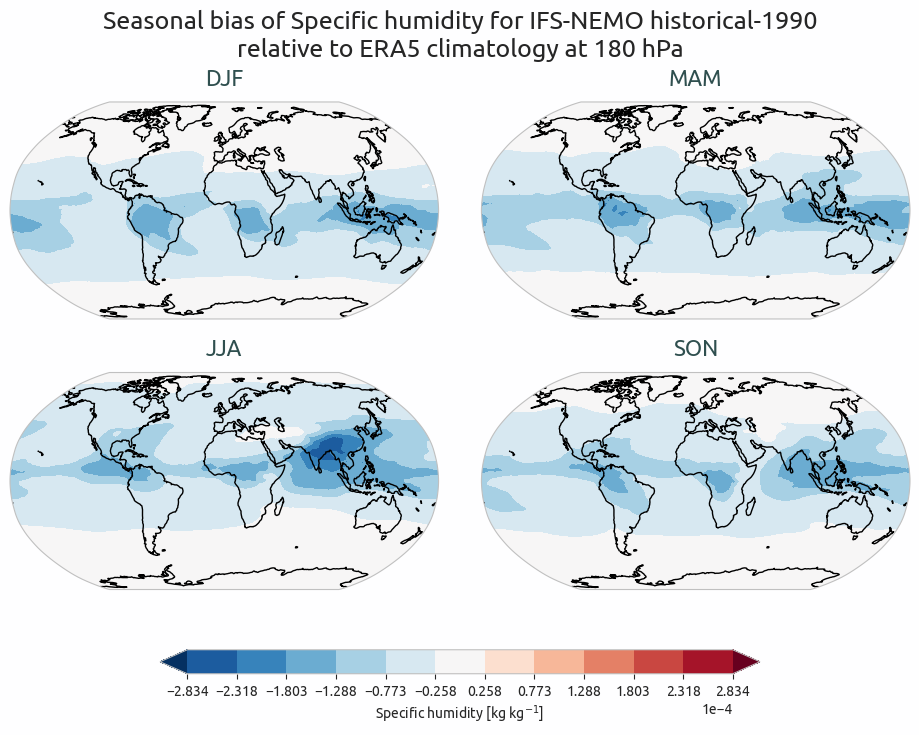

In [7]:
plot_biases.plot_seasonal_bias(data=biases_ifs_nemo.seasonal_climatology, data_ref=biases_era5.seasonal_climatology, var=var, plev=18000)

Finally, we can plot the vertical bias profile as a function of pressure levels:

2025-07-21 15:06:58 :: Global Biases :: INFO     -> Plotting vertical biases for variable: q
2025-07-21 15:08:06 :: Global Biases :: INFO     -> Vertical bias plot completed successfully.


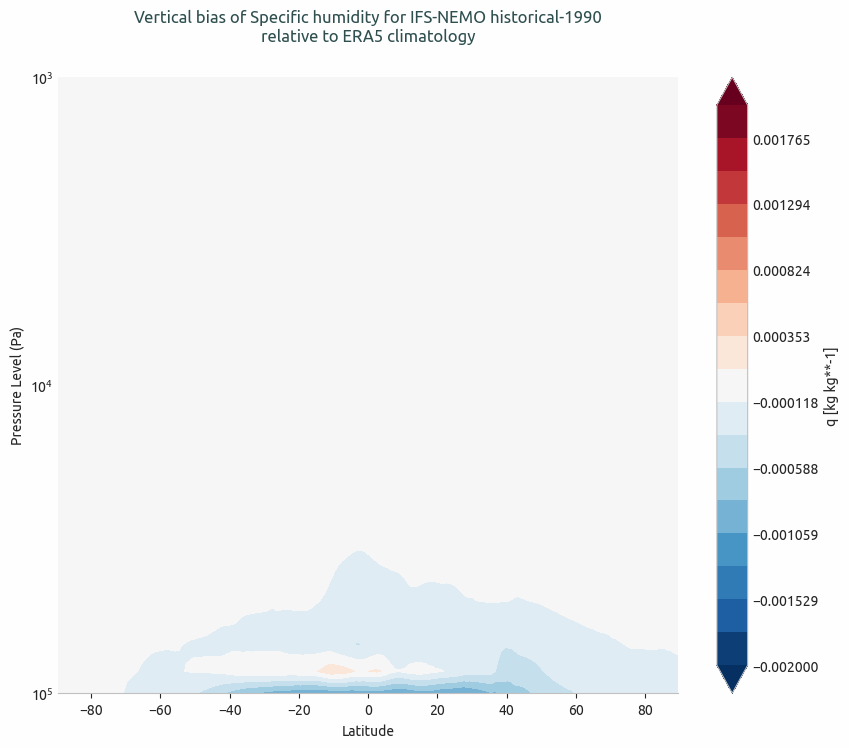

In [8]:
plot_biases.plot_vertical_bias(data=biases_ifs_nemo.climatology, data_ref=biases_era5.climatology, var=var,
                                vmin= -0.002, vmax= 0.002)

Different projections can be used to plot the bias maps. The default is `ccrs.Robinson`, but many others are available (see 'src/aqua/util/projections.py' for the full list). 

2025-07-21 15:08:07 :: Global Biases :: INFO     -> Plotting global biases.
2025-07-21 15:08:07 :: Pressure levels :: INFO     -> Selecting pressure level 18000 for variable 'q'.
2025-07-21 15:08:07 :: Pressure levels :: INFO     -> Selecting pressure level 18000 for variable 'q'.
2025-07-21 15:08:11 :: ConfigPath :: DEBUG    -> AQUA installation found in /users/caprioli/.aqua
2025-07-21 15:08:11 :: ConfigPath :: DEBUG    -> Configuration file found in /users/caprioli/.aqua/config-aqua.yaml
2025-07-21 15:08:11 :: ConfigPath :: DEBUG    -> Catalog found in /users/caprioli/.aqua/config-aqua.yaml file are ['ci', 'climatedt-phase1', 'climatedt-o25.1', 'obs']
2025-07-21 15:08:11 :: ConfigPath :: DEBUG    -> Available catalogs are ['ci', 'climatedt-phase1', 'climatedt-o25.1', 'obs']
2025-07-21 15:08:11 :: ConfigPath :: DEBUG    -> Default catalog will be ci
2025-07-21 15:08:11 :: ConfigPath :: DEBUG    -> Catalog file is /users/caprioli/.aqua/catalogs/ci/catalog.yaml
2025-07-21 15:08:11 :: C

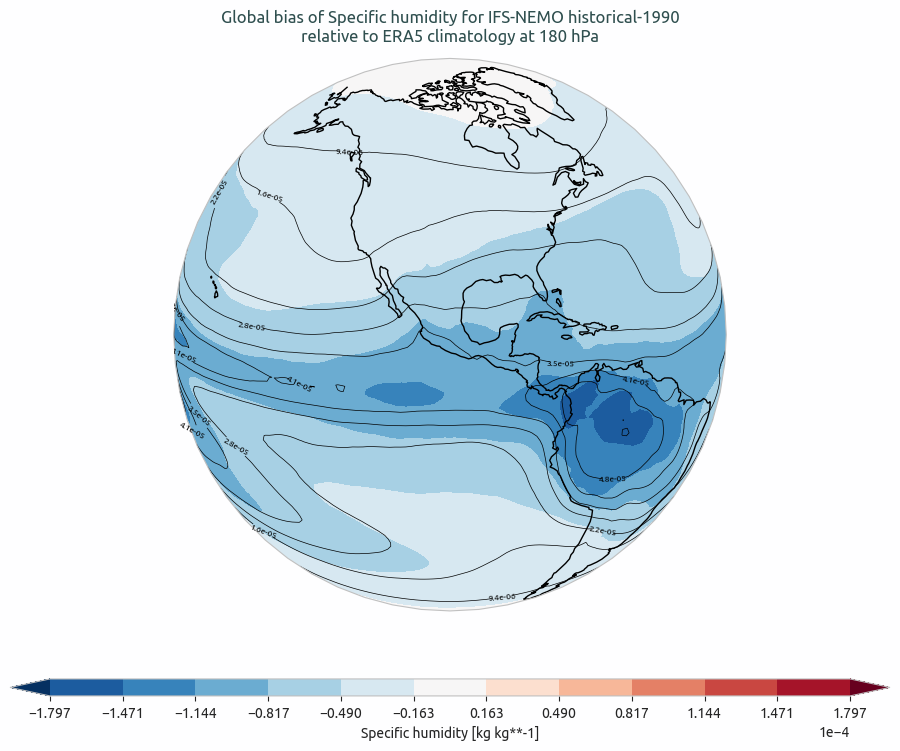

In [9]:
projection = "nearside"
projection_params = {
    "central_longitude": -100,
    "central_latitude": 20,
    "satellite_height": 35785831
}

plot_biases.plot_bias(data=biases_ifs_nemo.climatology, data_ref=biases_era5.climatology, var=var, plev=18000, proj=projection,
                      proj_params=projection_params)

The diagnostic is also able to handle the computation of user-defined formulae:

2025-07-21 15:12:28 :: ConfigPath :: DEBUG    -> AQUA installation found in /users/caprioli/.aqua
2025-07-21 15:12:28 :: ConfigPath :: DEBUG    -> Configuration file found in /users/caprioli/.aqua/config-aqua.yaml
2025-07-21 15:12:28 :: ConfigPath :: DEBUG    -> Available catalogs are ['climatedt-phase1']
2025-07-21 15:12:28 :: ConfigPath :: DEBUG    -> Default catalog will be climatedt-phase1
2025-07-21 15:12:28 :: ConfigPath :: DEBUG    -> Catalog file is /users/caprioli/.aqua/catalogs/climatedt-phase1/catalog.yaml
2025-07-21 15:12:28 :: ConfigPath :: DEBUG    -> Machine file is /users/caprioli/.aqua/catalogs/climatedt-phase1/machine.yaml
2025-07-21 15:12:28 :: ConfigPath :: DEBUG    -> Machine found in configuration file, set to lumi
2025-07-21 15:12:28 :: ConfigPath :: DEBUG    -> Machine found in configuration file, set to lumi
2025-07-21 15:12:28 :: ConfigPath :: DEBUG    -> Browsing catalog climatedt-phase1 ...
2025-07-21 15:12:28 :: ConfigPath :: DEBUG    -> Catalog file is /us

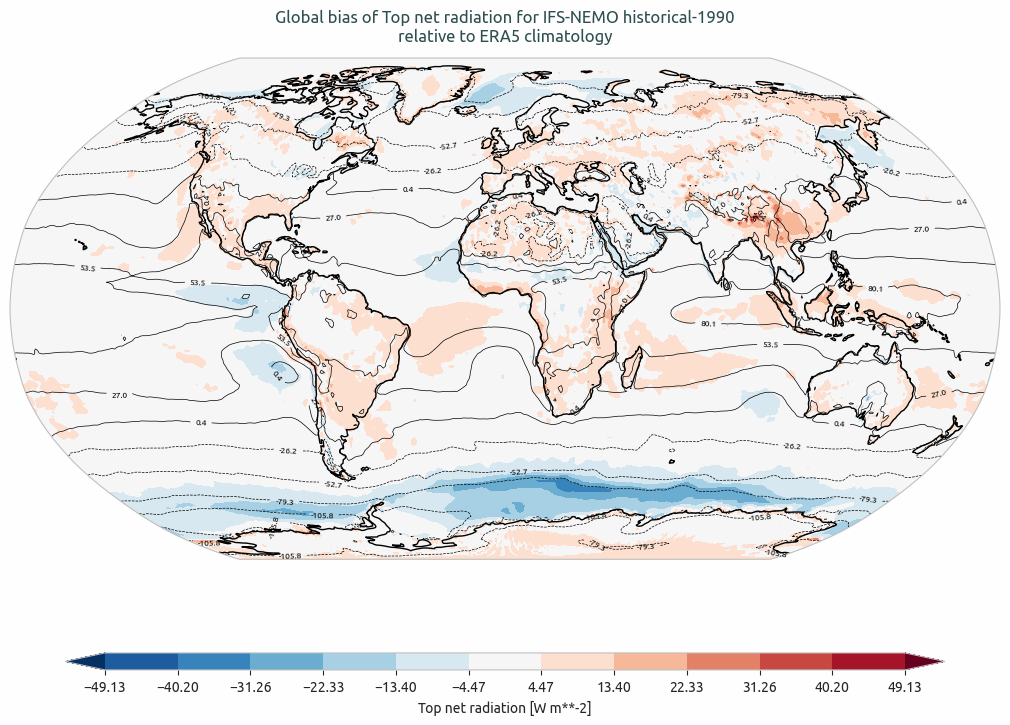

In [ ]:
var = 'tnlwrf+tnswrf'
long_name = 'Top net radiation'
short_name = 'tnr'

biases_ifs_nemo.retrieve(formula=True, var=var, long_name=long_name, short_name=short_name)
biases_ifs_nemo.compute_climatology(save_netcdf=False)

biases_era5.retrieve(var=var, formula=True, long_name=long_name, short_name=short_name)
biases_era5.compute_climatology(save_netcdf=False)

plot_biases = PlotGlobalBiases(save_pdf=False, save_png=False, loglevel='INFO')
plot_biases.plot_bias(data=biases_ifs_nemo.climatology, data_ref=biases_era5.climatology, var=short_name, plev=None)